Провести изучение инцидентов по месту их возникновения и затронутого пользователя 
с учетом степени воздействия и соответствия целевой SLA, с использованием методов: 
- иерархический метод кластерного анализа,
- метода к-средних,
- нейронной сети.  
Произвести тестирование и оценку эффективности работы методов, привести семантическую
 интерпретацию результатов.  
  Структура анализа данных:
- определение проблематики анализа данных;
- подготовка данных к анализу (очистка и преобразование);
- визуализация данных;
- исследование данных различными методами;
- формулирование выводов по полученным результатам анализа.


1. number: incident identifier (24,918 different values);
2. incident state: eight levels controlling the incident management process transitions from opening until closing the case;
3. active: boolean attribute that shows whether the record is active or closed/canceled;
4. reassignment_count: number of times the incident has the group or the support analysts changed;
5. reopen_count: number of times the incident resolution was rejected by the caller;
6. sys_mod_count: number of incident updates until that moment;
7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
8. caller_id: identifier of the user affected;
9. opened_by: identifier of the user who reported the incident;
10. opened_at: incident user opening date and time;
11. sys_created_by: identifier of the user who registered the incident;
12. sys_created_at: incident system creation date and time;
13. sys_updated_by: identifier of the user who updated the incident and generated the current log record;
14. sys_updated_at: incident system update date and time;
15. contact_type: categorical attribute that shows by what means the incident was reported;
16. location: identifier of the location of the place affected;
17. category: first-level description of the affected service;
18. subcategory: second-level description of the affected service (related to the first level description, i.e., to category);
19. u_symptom: description of the user perception about service availability;
20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
21. impact: description of the impact caused by the incident (values: 1“High; 2“Medium; 3“Low);
22. urgency: description of the urgency informed by the user for the incident resolution (values: 1“High; 2“Medium; 3“Low);
23. priority: calculated by the system based on 'impact' and 'urgency';
24. assignment_group: identifier of the support group in charge of the incident;
25. assigned_to: identifier of the user in charge of the incident;
26. knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
27. u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked;
28. notify: categorical attribute that shows whether notifications were generated for the incident;
29. problem_id: identifier of the problem associated with the incident;
30. rfc: (request for change) identifier of the change request associated with the incident;
31. vendor: identifier of the vendor in charge of the incident;
32. caused_by: identifier of the RFC responsible by the incident;
33. close_code: identifier of the resolution of the incident;
34. resolved_by: identifier of the user who resolved the incident;
35. resolved_at: incident user resolution date and time (dependent variable);
36. closed_at: incident user close date and time (dependent variable).



# Data prepearation #


In [138]:
import numpy as np
import pandas as pd

In [139]:
data = pd.read_csv("dataset.csv")
data = data[:5000]
data.head()


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [140]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   number                   5000 non-null   object
 1   incident_state           5000 non-null   object
 2   active                   5000 non-null   bool  
 3   reassignment_count       5000 non-null   int64 
 4   reopen_count             5000 non-null   int64 
 5   sys_mod_count            5000 non-null   int64 
 6   made_sla                 5000 non-null   bool  
 7   caller_id                5000 non-null   object
 8   opened_by                5000 non-null   object
 9   opened_at                5000 non-null   object
 10  sys_created_by           5000 non-null   object
 11  sys_created_at           5000 non-null   object
 12  sys_updated_by           5000 non-null   object
 13  sys_updated_at           5000 non-null   object
 14  contact_type             5000 non-null  

In [141]:
data.replace('(\?)', np.nan, regex=True, inplace=True)


In [142]:
firstLine = data.loc[0]
firstLine


number                          INC0000045
incident_state                         New
active                                True
reassignment_count                       0
reopen_count                             0
sys_mod_count                            0
made_sla                              True
caller_id                      Caller 2403
opened_by                     Opened by  8
opened_at                  29/2/2016 01:16
sys_created_by                Created by 6
sys_created_at             29/2/2016 01:23
sys_updated_by               Updated by 21
sys_updated_at             29/2/2016 01:23
contact_type                         Phone
location                      Location 143
category                       Category 55
subcategory                Subcategory 170
u_symptom                       Symptom 72
cmdb_ci                                NaN
impact                          2 - Medium
urgency                         2 - Medium
priority                      3 - Moderate
assignment_

In [143]:
columnList = ['caller_id', 'opened_by', 'opened_by', 'sys_created_by', 'sys_updated_by', 'location',
              'category', 'subcategory', 'u_symptom', 'assignment_group', 'assigned_to', 'problem_id',
              'closed_code', 'resolved_by', 'cmdb_ci']

# Поле вендор не содержит данных; Поле контакт_тайп содержит только Phone
data.drop(columns=['vendor', 'contact_type', 'number'], inplace=True)


for column in columnList:
    data[column].replace('([^0-9])', '', regex=True, inplace=True)
    data[column] = data[column].astype('string').astype('Int32')

data = data.astype({'incident_state': 'category',
                    'impact': 'category',
                    'urgency': 'category',
                    'priority': 'category',
                    'opened_at': 'datetime64',
                    'sys_created_at': 'datetime64',
                    'sys_updated_at': 'datetime64',
                    'resolved_at': 'datetime64',
                    'closed_at': 'datetime64',
                    'notify': 'category',
                    'rfc': 'category',
                    'caused_by': 'category',
                    })


In [144]:
resolveTime = data['closed_at'] - data['opened_at']
data['resolveTime'] = [i.days for i in resolveTime]


In [145]:
data.info()
firstLine = data.loc[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   incident_state           5000 non-null   category      
 1   active                   5000 non-null   bool          
 2   reassignment_count       5000 non-null   int64         
 3   reopen_count             5000 non-null   int64         
 4   sys_mod_count            5000 non-null   int64         
 5   made_sla                 5000 non-null   bool          
 6   caller_id                5000 non-null   Int32         
 7   opened_by                4461 non-null   Int32         
 8   opened_at                5000 non-null   datetime64[ns]
 9   sys_created_by           3626 non-null   Int32         
 10  sys_created_at           3626 non-null   datetime64[ns]
 11  sys_updated_by           5000 non-null   Int32         
 12  sys_updated_at           5000 non-

In [146]:
for col in data.columns:

    missing_values_counts = data[col].isna().sum()
    percentage = 100*data[col].isna().sum()/len(data[col])

    print("Column", col, "contains", missing_values_counts,
          "NULL values (",
          percentage, "% ).")


Column incident_state contains 0 NULL values ( 0.0 % ).
Column active contains 0 NULL values ( 0.0 % ).
Column reassignment_count contains 0 NULL values ( 0.0 % ).
Column reopen_count contains 0 NULL values ( 0.0 % ).
Column sys_mod_count contains 0 NULL values ( 0.0 % ).
Column made_sla contains 0 NULL values ( 0.0 % ).
Column caller_id contains 0 NULL values ( 0.0 % ).
Column opened_by contains 539 NULL values ( 10.78 % ).
Column opened_at contains 0 NULL values ( 0.0 % ).
Column sys_created_by contains 1374 NULL values ( 27.48 % ).
Column sys_created_at contains 1374 NULL values ( 27.48 % ).
Column sys_updated_by contains 0 NULL values ( 0.0 % ).
Column sys_updated_at contains 0 NULL values ( 0.0 % ).
Column location contains 11 NULL values ( 0.22 % ).
Column category contains 31 NULL values ( 0.62 % ).
Column subcategory contains 31 NULL values ( 0.62 % ).
Column u_symptom contains 1405 NULL values ( 28.1 % ).
Column cmdb_ci contains 4936 NULL values ( 98.72 % ).
Column impact cont

In [147]:
data.drop(
    columns=data.columns.values[data.dtypes == 'datetime64[ns]'], inplace=True)
data.drop(columns=['problem_id', 'rfc',   'caused_by', 'assigned_to',
                   'cmdb_ci', 'u_symptom', 'sys_created_by', 'sys_mod_count'], inplace=True)


In [148]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   incident_state           5000 non-null   category
 1   active                   5000 non-null   bool    
 2   reassignment_count       5000 non-null   int64   
 3   reopen_count             5000 non-null   int64   
 4   made_sla                 5000 non-null   bool    
 5   caller_id                5000 non-null   Int32   
 6   opened_by                4461 non-null   Int32   
 7   sys_updated_by           5000 non-null   Int32   
 8   location                 4989 non-null   Int32   
 9   category                 4969 non-null   Int32   
 10  subcategory              4969 non-null   Int32   
 11  impact                   5000 non-null   category
 12  urgency                  5000 non-null   category
 13  priority                 5000 non-null   category
 14  assignme

In [149]:
mean = {col: data[col].value_counts().index[0] for col in data.columns}
data.fillna(mean, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   incident_state           5000 non-null   category
 1   active                   5000 non-null   bool    
 2   reassignment_count       5000 non-null   int64   
 3   reopen_count             5000 non-null   int64   
 4   made_sla                 5000 non-null   bool    
 5   caller_id                5000 non-null   Int32   
 6   opened_by                5000 non-null   Int32   
 7   sys_updated_by           5000 non-null   Int32   
 8   location                 5000 non-null   Int32   
 9   category                 5000 non-null   Int32   
 10  subcategory              5000 non-null   Int32   
 11  impact                   5000 non-null   category
 12  urgency                  5000 non-null   category
 13  priority                 5000 non-null   category
 14  assignme

In [150]:
data.describe()


,reassignment_count,reopen_count,caller_id,opened_by,sys_updated_by,location,category,subcategory,assignment_group,closed_code,resolved_by,resolveTime
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.200800,0.013800,2642.722600,204.572600,586.264400,137.421200,38.185800,151.79200,44.582600,6.292600,122.173800,117.371400
std,1.975566,0.124951,1682.721072,138.954452,309.169011,56.387762,14.243337,81.78689,22.310068,1.957588,68.840033,69.529395
min,0.000000,0.000000,19.000000,4.000000,3.000000,2.000000,7.000000,3.00000,3.000000,1.000000,2.000000,-29.000000
25%,0.000000,0.000000,1102.000000,124.000000,310.000000,93.000000,26.000000,103.00000,25.000000,6.000000,62.000000,59.250000
50%,1.000000,0.000000,2632.000000,180.000000,695.000000,143.000000,42.000000,164.00000,39.000000,6.000000,133.000000,95.000000
75%,2.000000,0.000000,4106.000000,301.000000,908.000000,204.000000,53.000000,215.00000,70.000000,7.000000,180.000000,181.000000
max,18.000000,2.000000,5626.000000,536.000000,994.000000,249.000000,63.000000,303.00000,77.000000,17.000000,231.000000,335.000000


In [151]:
data_m1 = data.copy()

cat_columns = data_m1.select_dtypes(['category']).columns

data_m1[cat_columns] = data_m1[cat_columns].apply(lambda x: x.cat.codes)

bool_columns = data_m1.select_dtypes(['bool']).columns
data_m1[bool_columns] = data_m1[bool_columns].apply(lambda x: x.astype('int'))

data_m1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   incident_state           5000 non-null   int8 
 1   active                   5000 non-null   int32
 2   reassignment_count       5000 non-null   int64
 3   reopen_count             5000 non-null   int64
 4   made_sla                 5000 non-null   int32
 5   caller_id                5000 non-null   Int32
 6   opened_by                5000 non-null   Int32
 7   sys_updated_by           5000 non-null   Int32
 8   location                 5000 non-null   Int32
 9   category                 5000 non-null   Int32
 10  subcategory              5000 non-null   Int32
 11  impact                   5000 non-null   int8 
 12  urgency                  5000 non-null   int8 
 13  priority                 5000 non-null   int8 
 14  assignment_group         5000 non-null   Int32
 15  know

In [152]:
import sklearn.preprocessing as prepro

scaler = prepro.StandardScaler()

data_scaled = scaler.fit_transform(data_m1)
data_scaled = pd.DataFrame(data_scaled, columns=data_m1.columns.values)
data_scaled['made_sla'] = data_m1['made_sla'].astype(int)

data_scaled.head()


,incident_state,active,reassignment_count,reopen_count,made_sla,caller_id,opened_by,sys_updated_by,location,category,...,impact,urgency,priority,assignment_group,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolveTime
0,0.735029,0.416123,-0.607887,-0.110455,1,-0.142476,-1.414796,-1.828517,0.098946,1.180614,...,-0.071401,-0.102456,0.000831,0.511811,0.066479,-0.273508,0.0,-0.660368,0.389728,-0.767686
1,1.291447,0.416123,-0.607887,-0.110455,1,-0.142476,-1.414796,0.180294,0.098946,1.180614,...,-0.071401,-0.102456,0.000831,0.511811,0.066479,-0.273508,0.0,-0.660368,0.389728,-0.767686
2,1.291447,0.416123,-0.607887,-0.110455,1,-0.142476,-1.414796,0.704331,0.098946,1.180614,...,-0.071401,-0.102456,0.000831,0.511811,0.066479,-0.273508,0.0,-0.660368,0.389728,-0.767686
3,0.178610,-2.403137,-0.607887,-0.110455,1,-0.142476,-1.414796,1.040750,0.098946,1.180614,...,-0.071401,-0.102456,0.000831,0.511811,0.066479,-0.273508,0.0,-0.660368,0.389728,-0.767686
4,0.735029,0.416123,-0.607887,-0.110455,1,-0.142476,1.384962,0.516713,0.489141,0.127385,...,-0.071401,-0.102456,0.000831,1.139393,0.066479,-0.273508,0.0,-0.660368,-0.598168,-0.321787


# Exploratory data analysis

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prepro


In [154]:
print(data_m1.describe())

       incident_state       active  reassignment_count  reopen_count  \
count     5000.000000  5000.000000         5000.000000   5000.000000   
mean         2.679000     0.852400            1.200800      0.013800   
std          1.797388     0.354739            1.975566      0.124951   
min          0.000000     0.000000            0.000000      0.000000   
25%          1.000000     1.000000            0.000000      0.000000   
50%          3.000000     1.000000            1.000000      0.000000   
75%          4.000000     1.000000            2.000000      0.000000   
max          5.000000     1.000000           18.000000      2.000000   

          made_sla    caller_id    opened_by  sys_updated_by     location  \
count  5000.000000  5000.000000  5000.000000     5000.000000  5000.000000   
mean      0.938200  2642.722600   204.572600      586.264400   137.421200   
std       0.240816  1682.721072   138.954452      309.169011    56.387762   
min       0.000000    19.000000     4.00000

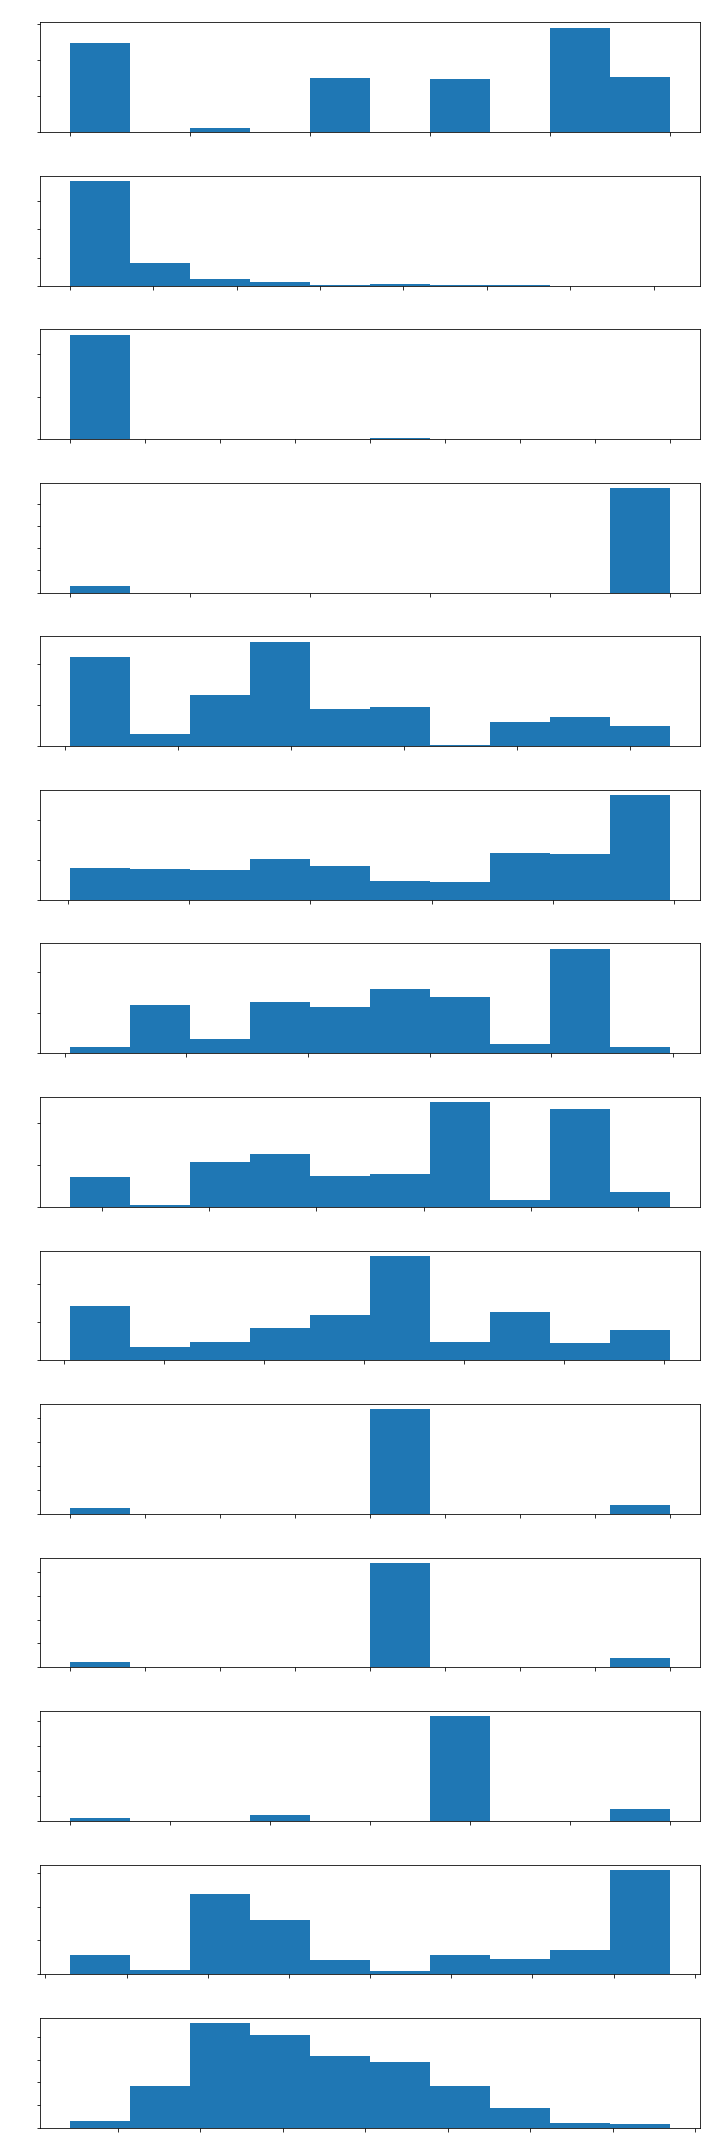

In [155]:
histColumns = np.array(['incident_state', 'reassignment_count', 'reopen_count', 'made_sla',
                        'opened_by', 'sys_updated_by',
                        'location', 'category', 'subcategory', 'impact', 'urgency', 'priority', 'assignment_group', 'resolveTime'])
fig, ax = plt.subplots(nrows=14, ncols=1, figsize=(10, 30))

i = 0

for row in ax:
    row.hist(data_m1[histColumns[i]].dropna())
    row.set_title(histColumns[i], color='white')
    row.tick_params(labelcolor='white')
    i += 1

plt.tight_layout()
plt.show()


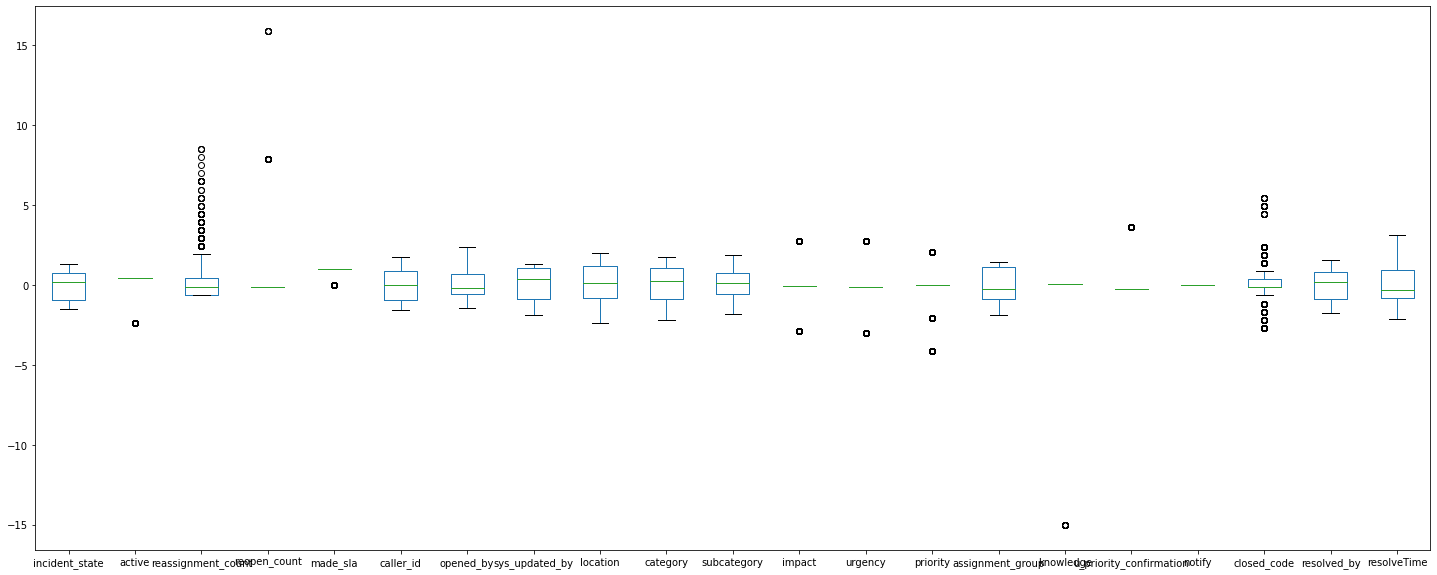

In [156]:
data_scaled.plot(kind='box', figsize=(25, 10))
plt.show()


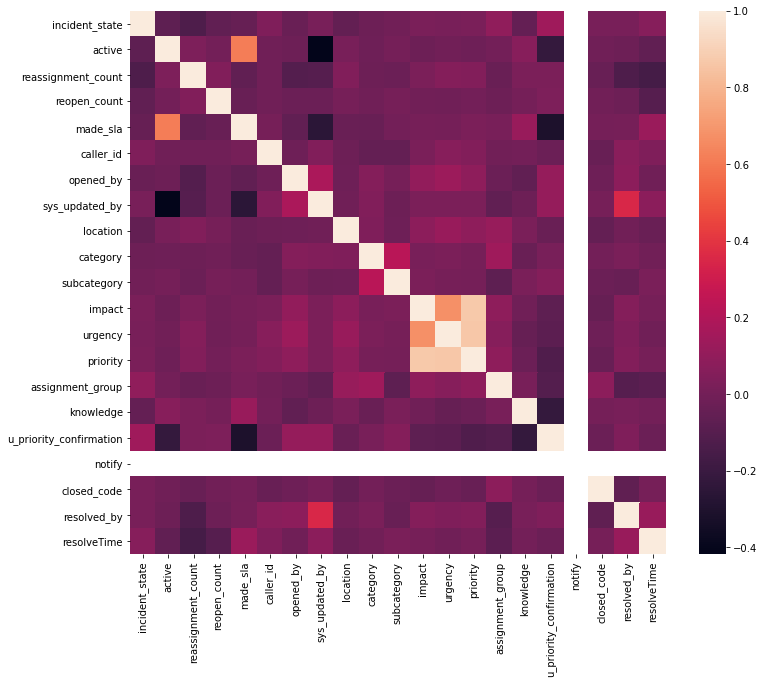

In [157]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(data_scaled.corr())
plt.show()

# Анализ данных 


## 1. Иерархический метод кластерного анализа

In [158]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.normalize(data_m1)


In [159]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в
# специальной переменной (используется ниже для визуализации
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')


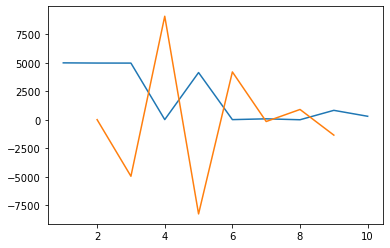

clusters: 4


In [160]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 3]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
clusterAmmount = acceleration_rev.argmax() + 2
print("clusters:", clusterAmmount)


In [161]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(data_scaled)
pca_2d = pca.transform(data_scaled)

aaaa = pca.components_
aaaa

array([[-0.01540642,  0.01946548, -0.02660474,  0.01227664, -0.00095632,
        -0.05038275, -0.10703653, -0.0489274 , -0.10359091, -0.03447359,
        -0.01142346, -0.54845282, -0.5498422 , -0.5902378 , -0.08611086,
         0.02091226,  0.07833452,  0.        ,  0.03448559, -0.05786355,
        -0.00717065],
       [ 0.16237939, -0.44247788, -0.23342225, -0.06888982, -0.06949336,
         0.06997291,  0.24636793,  0.54716352, -0.09753218,  0.04812586,
         0.01927414, -0.01776118, -0.02250558, -0.03568139, -0.14165666,
        -0.17055172,  0.32988492, -0.        , -0.02430076,  0.36682289,
         0.20342206]])

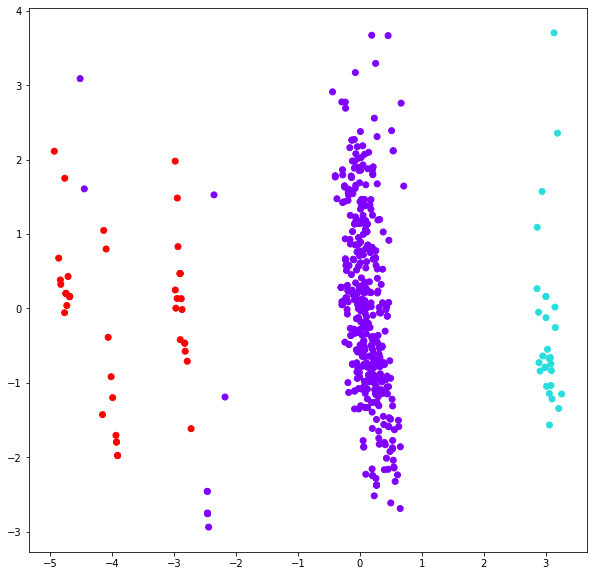

In [162]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=clusterAmmount, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(pca_2d[:500, 0], pca_2d[:500, 1], c=cluster.labels_[:500], cmap='rainbow')
plt.show()

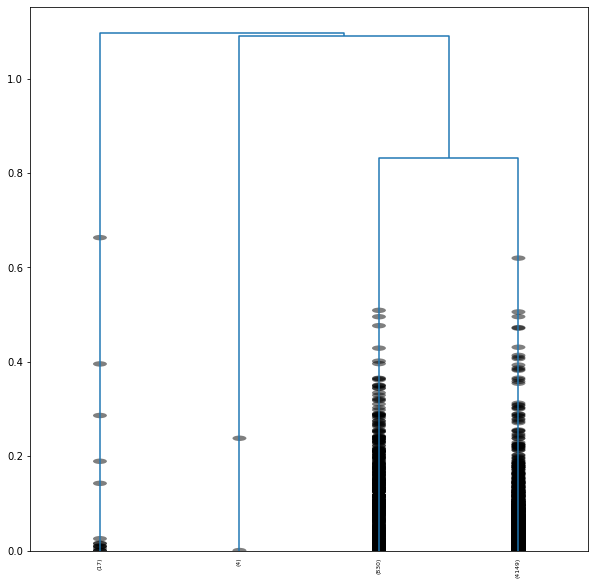

In [163]:
nCluster = 4
fig, ax = plt.subplots(figsize=(10, 10))
# строим дендрограмму
meow = dendrogram(data_linkage,
                  leaf_rotation=90,
                  leaf_font_size=6,
                  truncate_mode='lastp',
                  p=nCluster,
                  show_contracted=True
                  )
plt.show()


In [164]:
res = data_m1[histColumns]
res['cluster'] = cluster.labels_
grp = res.groupby('cluster')[histColumns].mean()
grp['ammount'] = res.groupby('cluster').size().values
print(grp)

         incident_state  reassignment_count  reopen_count  made_sla  \
cluster                                                               
0              2.689302            1.267442      0.016047  0.943488   
1              2.519403            0.770149      0.000000  0.877612   
2              4.000000            0.363636      0.000000  0.500000   
3              2.620991            0.839650      0.000000  0.959184   

          opened_by  sys_updated_by    location   category  subcategory  \
cluster                                                                   
0        198.007674      585.240698  135.807209   38.01186   151.847209   
1             199.2      553.170149  136.062687  38.408955   145.525373   
2        336.909091      678.909091  120.636364  45.363636   125.818182   
3        283.632653      625.478134  160.058309  39.688047   158.886297   

           impact   urgency  priority  assignment_group  resolveTime  ammount  
cluster                                   

<ipython-input-164-c75a5fe66a6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['cluster'] = cluster.labels_


In [165]:
print(meow['ivl'])


['(17)', '(4)', '(830)', '(4149)']


## 2. Метод к-средних

In [166]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=clusterAmmount)
model.fit(data_m1)

all_predictions = model.predict(data_m1)
all_predictions


array([3, 3, 3, ..., 2, 2, 2])

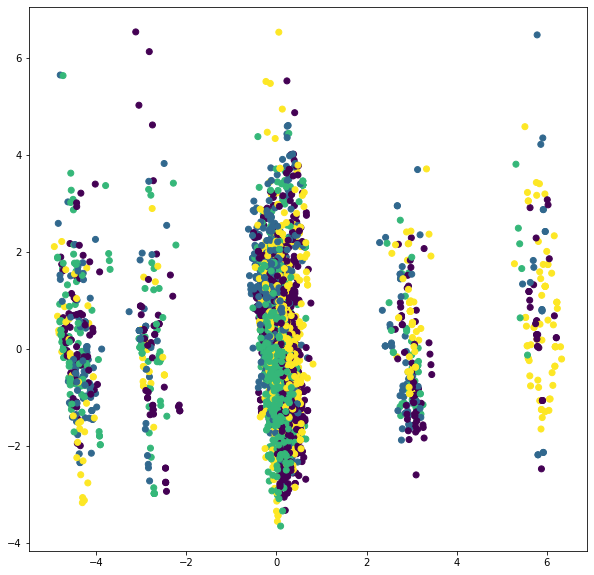

In [167]:

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(pca_2d[:, 0], pca_2d[:, 1], c=all_predictions)
i = 0
# for point in pca_2d:
#    ax.annotate(i, xy=(point[0] + 0.02, point[1]))
#    i += 1
plt.show()


In [168]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.14145959, 0.09635333])

In [169]:
res = data_m1[histColumns]
res['cluster'] = all_predictions
grp = res.groupby('cluster')[histColumns].mean()
grp['ammount'] = res.groupby('cluster').size().values
print(grp)

         incident_state  reassignment_count  reopen_count  made_sla  \
cluster                                                               
0              2.546641            1.112851      0.026093  0.933464   
1              2.732159            1.015859      0.014978  0.941850   
2              2.755805            1.425140      0.006405  0.936749   
3              2.722068            1.260388      0.003693  0.942752   

          opened_by  sys_updated_by    location   category  subcategory  \
cluster                                                                   
0        218.351598      567.088715  136.956947  38.690802   159.208089   
1         212.33304      615.777974  126.035242  37.727753   147.986784   
2        193.598879      575.797438  147.041633   37.53803   154.590072   
3        189.590951      594.548476  138.915974  38.698061   142.055402   

           impact   urgency  priority  assignment_group  resolveTime  ammount  
cluster                                   

<ipython-input-169-59172e891da1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['cluster'] = all_predictions


## 3. Неройронная сеть

### Подготовка данных

In [170]:
from keras.models import Sequential
from keras import models
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [171]:
Y = data_scaled['made_sla']
X = data_scaled[data_m1.columns[data_m1.columns != 'made_sla']].astype('int')


In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# fix random seed for reproducibility
seed = 8
np.random.seed(seed)


In [173]:
def create_baseline():
    model = Sequential()
    model.add(Dense(20, input_dim=20,
                    kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model


In [174]:
# evaluate model with standardized dataset
# показывает среднее и стандартное отклонение оценочной точности модели на невидимых данных.
estimator = KerasClassifier(
    build_fn=create_baseline, epochs=10, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train.iloc[:260], Y_train[:260], cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Results: 95.77% (1.15%)


In [175]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [176]:
model_est = estimator
# model_est = models.load_model('model')
model_est.fit(X_train, Y_train)


In [178]:
pred = model_est.predict(X_test)
pred

C:\Users\Col1nkl\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [185]:
model_est.score(X_test, Y_test)*100


96.88000082969666

In [ ]:
model_est.model.save('model')


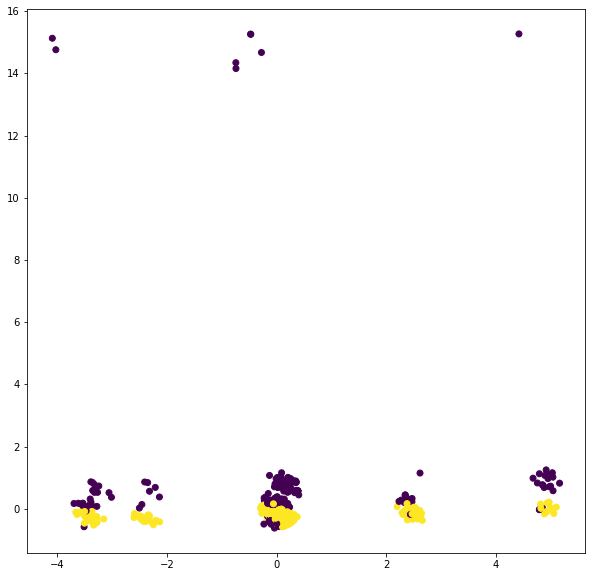

In [ ]:
pca = PCA(n_components=2).fit(X_test)
pca_2d = pca.transform(X_test)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(pca_2d[:, 0], pca_2d[:, 1], c=pred)
i = 0
# for point in pca_2d:
#    ax.annotate(i, xy=(point[0] + 0.02, point[1]))
#    i += 1
plt.show()
